# Tune_lgb
* 제출결과 : 0.3913216698

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import lightgbm as lgb

In [2]:
path = "./data/" 
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

## DATA Setting

In [3]:
column_number = {}
number_columns = {}
for i, column in enumerate(sample_submission_df.columns):
    column_number[column] = i
    number_columns[i] = column
    
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))


In [4]:
def add_minus_feature(data,test = False):
    from itertools import combinations
    n = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
        for combi in list(combinations(selected,2)):
            name_1st = str.split(combi[0],'_')[1]
            name_2nd = str.split(combi[1],'_')[1]
            data[mag+"_"+name_1st+"-"+name_2nd] = data[combi[0]]-data[combi[1]]
        n=count
    return data

In [5]:
train_df = add_minus_feature(train_df)
test_df = add_minus_feature(test_df,True)

In [6]:
train_X = train_df.drop(columns=['type', 'type_num'], axis=1)
train_y = train_df['type_num']
test_X = test_df

In [7]:
train_X.head()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,...,petroMag_g-i,petroMag_g-z,petroMag_r-i,petroMag_r-z,petroMag_i-z,modelMag_u-g,modelMag_u-r,modelMag_u-i,modelMag_u-z,modelMag_g-r,modelMag_g-i,modelMag_g-z,modelMag_r-i,modelMag_r-z,modelMag_i-z
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,...,0.286226,1.009190,0.332902,1.055866,0.722964,1.283708,1.385054,1.728637,1.601901,0.101347,0.444929,0.318194,0.343582,0.216847,-0.126735
1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,...,0.139156,0.132308,0.249893,0.243045,-0.006847,0.734428,0.739030,0.799566,0.980641,0.004602,0.065138,0.246213,0.060537,0.241611,0.181074
2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,...,-0.005426,-0.069222,-0.055336,-0.119132,-0.063796,1.120628,1.176814,1.157885,1.129134,0.056186,0.037257,0.008506,-0.018929,-0.047680,-0.028751
3,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,...,0.242810,0.538610,0.234614,0.530413,0.295800,0.769012,0.880913,1.012598,1.217856,0.111901,0.243586,0.448844,0.131685,0.336943,0.205258
4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,...,2.816917,4.050788,2.063539,3.297411,1.233871,1.729059,3.401710,5.389723,6.501398,1.672651,3.660663,4.772338,1.988012,3.099688,1.111675


In [8]:
train_X.columns

Index(['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
       'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
       'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z',
       'psfMag_u-g', 'psfMag_u-r', 'psfMag_u-i', 'psfMag_u-z', 'psfMag_g-r',
       'psfMag_g-i', 'psfMag_g-z', 'psfMag_r-i', 'psfMag_r-z', 'psfMag_i-z',
       'fiberMag_u-g', 'fiberMag_u-r', 'fiberMag_u-i', 'fiberMag_u-z',
       'fiberMag_g-r', 'fiberMag_g-i', 'fiberMag_g-z', 'fiberMag_r-i',
       'fiberMag_r-z', 'fiberMag_i-z', 'petroMag_u-g', 'petroMag_u-r',
       'petroMag_u-i', 'petroMag_u-z', 'petroMag_g-r', 'petroMag_g-i',
       'petroMag_g-z', 'petroMag_r-i', 'petroMag_r-z', 'petroMag_i-z',
       'modelMag_u-g', 'modelMag_u-r', 'modelMag_u-i', 'modelMag_u-z',
       'modelMag_g-r', 'modelMag_g-i', 'modelMag_g-z', 'modelMag_r-i',
       'modelMag_r-z', 'modelMag_i-z'],


In [9]:
## u-g, g-r, r-i, i-z 만 남기는게 좋지 않을까????
train_X.drop(['psfMag_u-r','psfMag_u-i','psfMag_u-z','psfMag_g-i','psfMag_g-z','psfMag_r-z',
             'fiberMag_u-r','fiberMag_u-i','fiberMag_u-z','fiberMag_g-i','fiberMag_g-z','fiberMag_r-z',
             'petroMag_u-r','petroMag_u-i','petroMag_u-z','petroMag_g-i','petroMag_g-z','petroMag_r-z',
             'modelMag_u-r','modelMag_u-i','modelMag_u-z','modelMag_g-i','modelMag_g-z','modelMag_r-z'] ,axis=1, inplace=True)

test_X.drop(['psfMag_u-r','psfMag_u-i','psfMag_u-z','psfMag_g-i','psfMag_g-z','psfMag_r-z',
             'fiberMag_u-r','fiberMag_u-i','fiberMag_u-z','fiberMag_g-i','fiberMag_g-z','fiberMag_r-z',
             'petroMag_u-r','petroMag_u-i','petroMag_u-z','petroMag_g-i','petroMag_g-z','petroMag_r-z',
             'modelMag_u-r','modelMag_u-i','modelMag_u-z','modelMag_g-i','modelMag_g-z','modelMag_r-z'] ,axis=1, inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42,stratify = train_y)

In [11]:
train_ds = lgb.Dataset(X_train, label = y_train, categorical_feature=['fiberID'])
test_ds = lgb.Dataset(X_test, label = y_test, categorical_feature=['fiberID']) 

In [13]:
params = {
    'boosting_type': 'dart',
    'objective': 'multiclass',
    'num_class': train_y.nunique(),
    'metric': {'multi_logloss','multi_logloss'},
    'num_leaves': 25,
    'learning_rate': 0.01,
    'max_depth' : 12,
    'random_state' : 80
}

## Modeling

In [14]:
evaluation_results = {}
lgmb_model = lgb.train(params, train_ds,num_boost_round= 5000, 
                       valid_sets = [train_ds,test_ds], valid_names=['Train', 'Test'],
                       evals_result=evaluation_results,
                       verbose_eval=100, early_stopping_rounds=100)

C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	Train's multi_logloss: 1.88784	Test's multi_logloss: 1.89678
[200]	Train's multi_logloss: 1.49316	Test's multi_logloss: 1.50838
[300]	Train's multi_logloss: 1.17537	Test's multi_logloss: 1.19768
[400]	Train's multi_logloss: 1.05307	Test's multi_logloss: 1.07958
[500]	Train's multi_logloss: 0.927004	Test's multi_logloss: 0.959547
[600]	Train's multi_logloss: 0.836488	Test's multi_logloss: 0.873357
[700]	Train's multi_logloss: 0.738691	Test's multi_logloss: 0.780911
[800]	Train's multi_logloss: 0.665796	Test's multi_logloss: 0.713273
[900]	Train's multi_logloss: 0.619425	Test's multi_logloss: 0.671484
[1000]	Train's multi_logloss: 0.552305	Test's multi_logloss: 0.611053
[1100]	Train's multi_logloss: 0.517252	Test's multi_logloss: 0.581266
[1200]	Train's multi_logloss: 0.485497	Test's multi_logloss: 0.554592
[1300]	Train's multi_logloss: 0.470032	Test's multi_logloss: 0.542546
[1400]	Train's multi_logloss: 0.429973	Test's multi_logloss: 0.508951
[1500]	Train's multi_logloss: 0.4066	

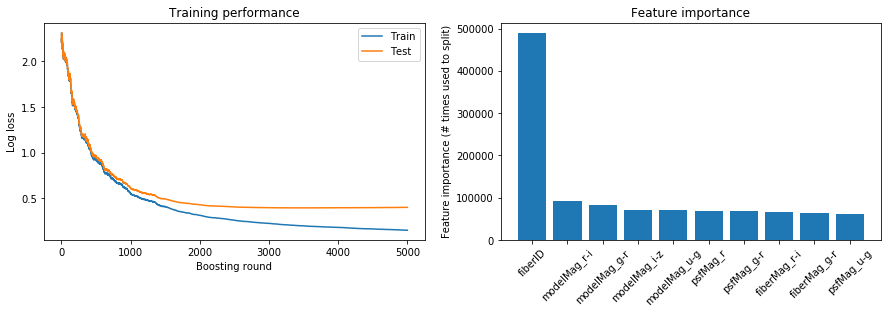

In [15]:
fig, axs = plt.subplots(1, 2, figsize=[15, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['multi_logloss'], label='Train')
axs[0].plot(evaluation_results['Test']['multi_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': lgmb_model.feature_name(), 
                            'importance': lgmb_model.feature_importance()}).sort_values('importance', ascending=False).head(10)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')
plt.xticks(rotation=45)

plt.show()

In [ ]:
train_y_pred = lgmb_model.predict(X_test)
real_y_pred = lgmb_model.predict(test_X)

In [ ]:
#log_loss
log_loss(y_test,train_y_pred,labels= list(set(y_test)))

In [ ]:
feature_df = pd.DataFrame(lgmb_model.feature_importance(), index= train_X.columns,columns= ['importance']).sort_values('importance',ascending = False)
feature_df.head(10)

## Gridsearch_cv

In [11]:
# from sklearn.feature_selection import SelectKBest
# model_kbest = SelectKBest()
# from sklearn.pipeline import Pipeline

In [12]:
# #최적의 변수를 찾기 위한 KBest 함수 불러오기
# #파이프라인 구축
# pipe_lgbm = Pipeline([('lgbm',lgbm_c)])
# #파라미터 생성
# params_lgbm = {
#           "lgbm__max_depth": [15,20,25],
#          "lgbm__learning_rate": [0.001],
#          "lgbm__num_leaves": [15,20,25],
#          "lgbm__n_estimators": [200,300,400,500],
#          "lgbm__random_state": [42]}

NameError: name 'lgbm' is not defined

In [ ]:
# #최적의 파라미터 탐색
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(pipe_lgbm, param_grid = params_lgbm,
# #                           cv=3, n_jobs=-1, verbose=10)

In [ ]:
# grid_search.fit(X_train, y_train)

In [ ]:
# lgbm_grid = grid_search.best_estimator_
# lgbm_grid